In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

%config InlineBackend.figure_format ='retina'

In [2]:
olympics = pd.read_csv('athlete_events.csv',delimiter=',',skipfooter=14,engine='python')

In [3]:
avg_heights_summer = olympics[olympics['Season'] == 'Summer'].groupby(by=['ID','Year']).mean()
avg_heights_winter = olympics[olympics['Season'] == 'Winter'].groupby(by=['ID','Year']).mean()

In [4]:
avg_heights_winter_plot = avg_heights_winter.reset_index()[['Year','Height']].groupby(by=['Year']).mean()
avg_heights_summer_plot = avg_heights_summer.reset_index()[['Year','Height']].groupby(by=['Year']).mean()

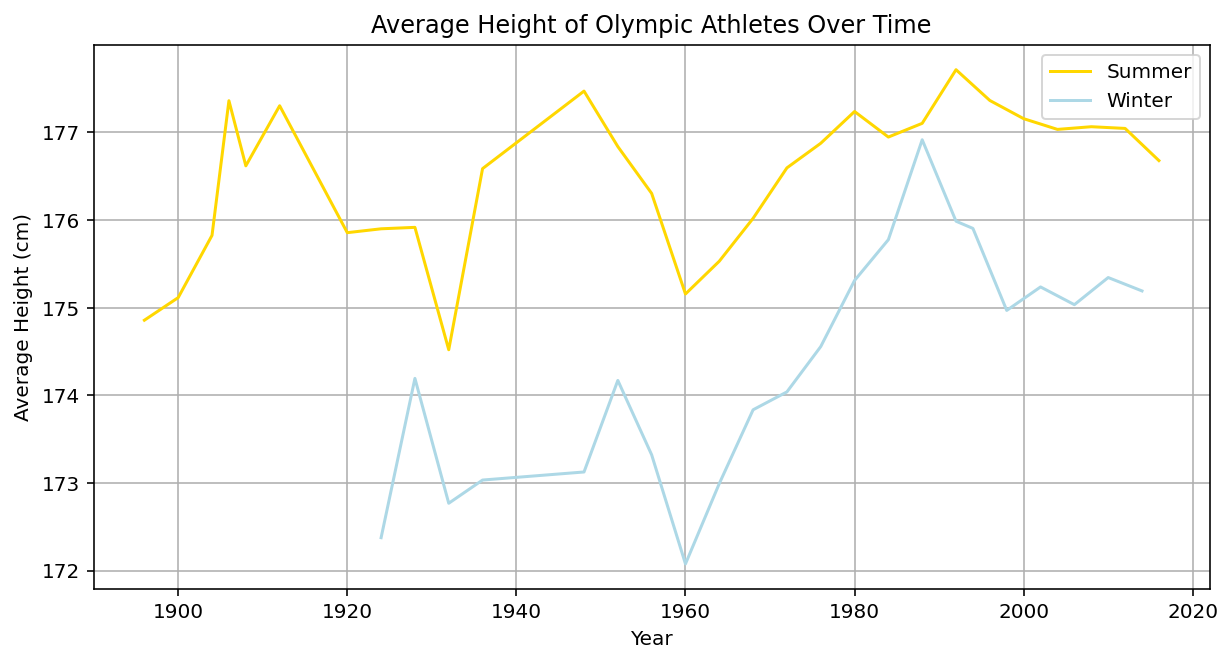

In [5]:
plt.figure(figsize=(10,5))
plt.plot(avg_heights_summer_plot.index, avg_heights_summer_plot.values, label='Summer', c='gold')
plt.plot(avg_heights_winter_plot.index, avg_heights_winter_plot.values, label='Winter', c='lightblue')
plt.xlabel('Year')
plt.ylabel('Average Height (cm)')
plt.title('Average Height of Olympic Athletes Over Time')
plt.grid(True)
plt.legend()
plt.show()

In [6]:
avg_weights_summer = olympics[olympics['Season'] == 'Summer'].groupby(by=['ID','Year']).mean()
avg_weights_winter = olympics[olympics['Season'] == 'Winter'].groupby(by=['ID','Year']).mean()

In [7]:
avg_weights_winter_plot = avg_weights_winter.reset_index()[['Year','Weight']].groupby(by=['Year']).mean()
avg_weights_summer_plot = avg_weights_summer.reset_index()[['Year','Weight']].groupby(by=['Year']).mean()

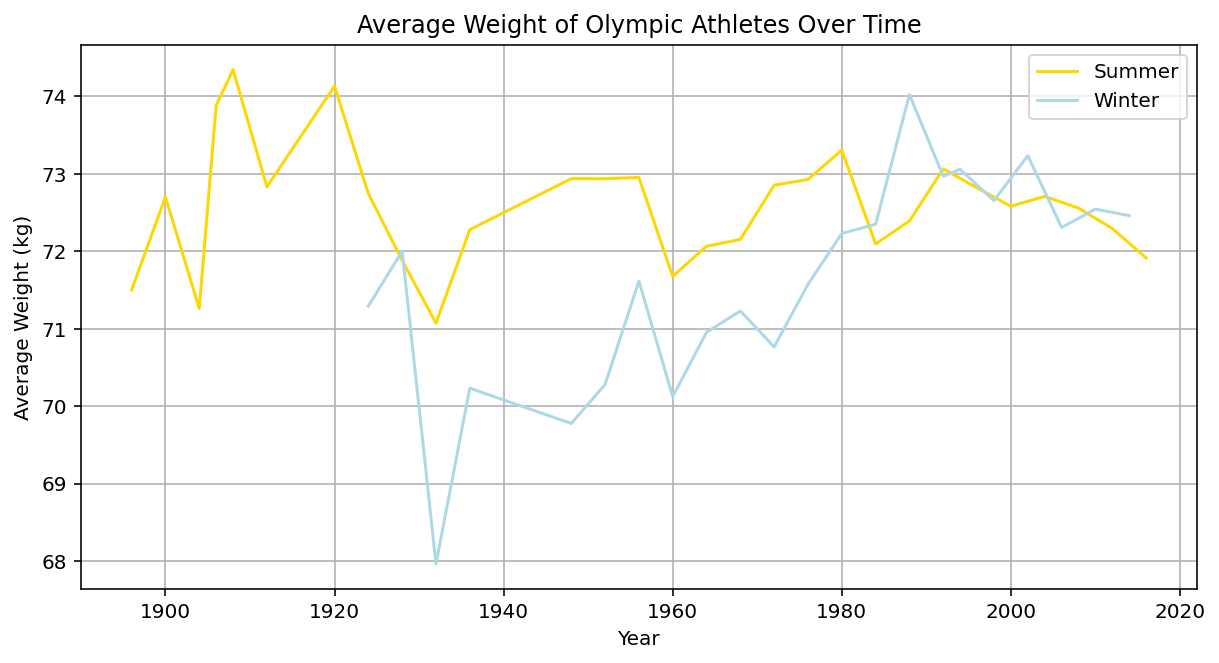

In [29]:
plt.figure(figsize=(10,5))
plt.plot(avg_weights_summer_plot.index, avg_weights_summer_plot.values, label='Summer', c='gold')
plt.plot(avg_weights_winter_plot.index, avg_weights_winter_plot.values, label='Winter', c='lightblue')
plt.xlabel('Year')
plt.ylabel('Average Weight (kg)')
plt.title('Average Weight of Olympic Athletes Over Time')
plt.grid(True)
plt.legend()
plt.show()


In [9]:
basketball_df = olympics[olympics['Sport'] == 'Basketball']
avg_heights_basketball = basketball_df.groupby('Year')['Height'].mean()


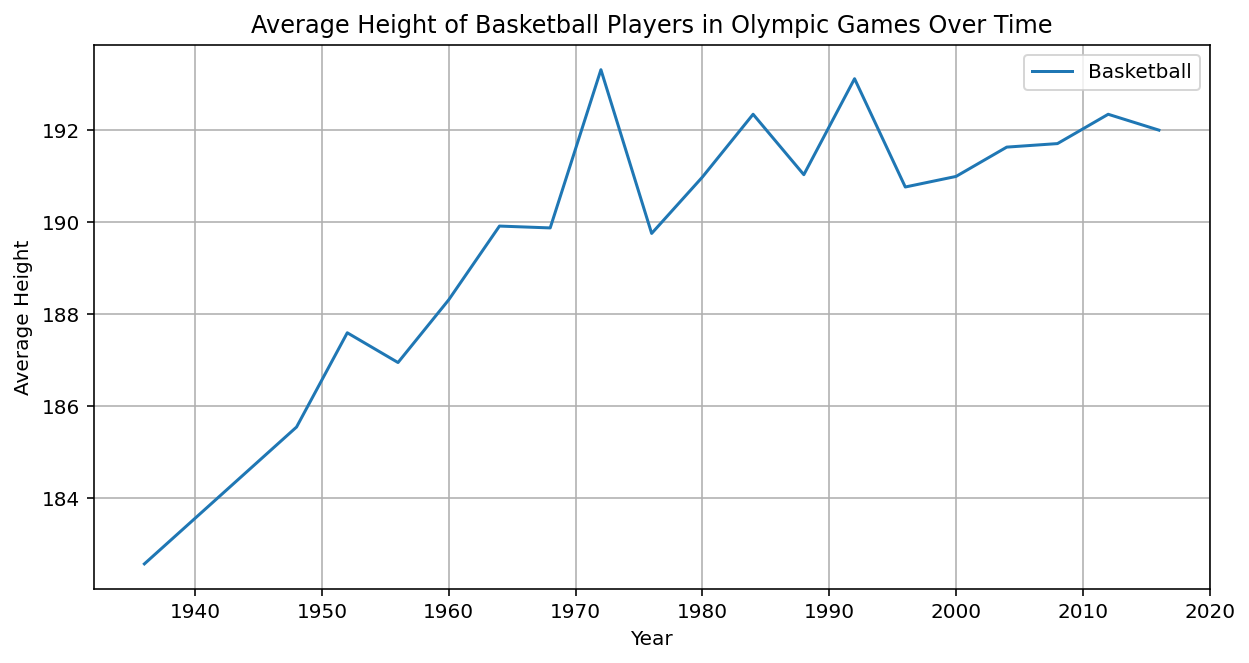

In [10]:
plt.figure(figsize=(10,5))
plt.plot(avg_heights_basketball.index, avg_heights_basketball.values, label='Basketball')
plt.xlabel('Year')
plt.ylabel('Average Height')
plt.title('Average Height of Basketball Players in Olympic Games Over Time')
plt.grid(True)
plt.legend()
plt.show()


In [11]:
df_1960_onward = olympics[olympics['Year'] >= 1960]
avg_heights_summer_1960_onward = df_1960_onward[df_1960_onward['Season'] == 'Summer'].groupby('Year')['Height'].mean()
avg_heights_winter_1960_onward = df_1960_onward[df_1960_onward['Season'] == 'Winter'].groupby('Year')['Height'].mean()

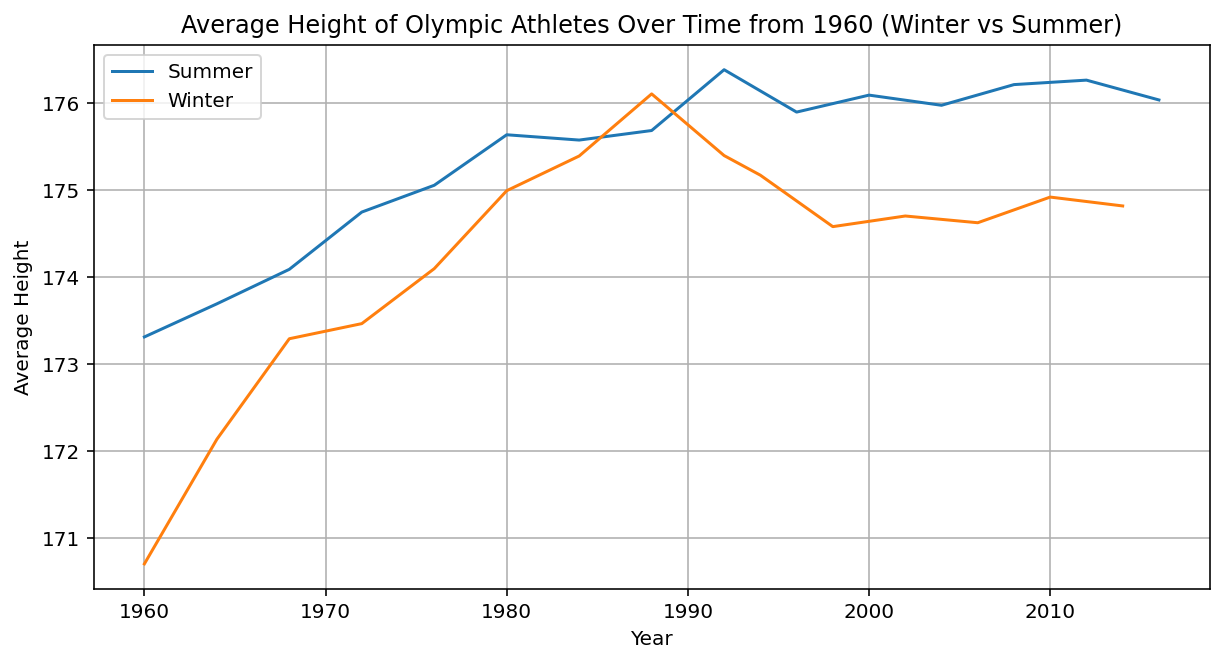

In [12]:
plt.figure(figsize=(10,5))
plt.plot(avg_heights_summer_1960_onward.index, avg_heights_summer_1960_onward.values, label='Summer')
plt.plot(avg_heights_winter_1960_onward.index, avg_heights_winter_1960_onward.values, label='Winter')
plt.xlabel('Year')
plt.ylabel('Average Height')
plt.title('Average Height of Olympic Athletes Over Time from 1960 (Winter vs Summer)')
plt.grid(True)
plt.legend()
plt.show()


In [13]:
#over time height and weight (in some sport) for only medal winners 
#Age distribution

In [18]:
medal_winners_df = olympics.dropna(subset=['Medal'])
avg_heights_medal_winners = olympics.groupby(by=['ID','Year']).mean()
avg_weights_medal_winners = olympics.groupby(by=['ID','Year']).mean()

In [20]:
avg_heights_medal_winners = avg_heights_winter.reset_index()[['Year','Height']].groupby(by=['Year']).mean()
avg_weights_medal_winners = avg_weights_summer.reset_index()[['Year','Weight']].groupby(by=['Year']).mean()

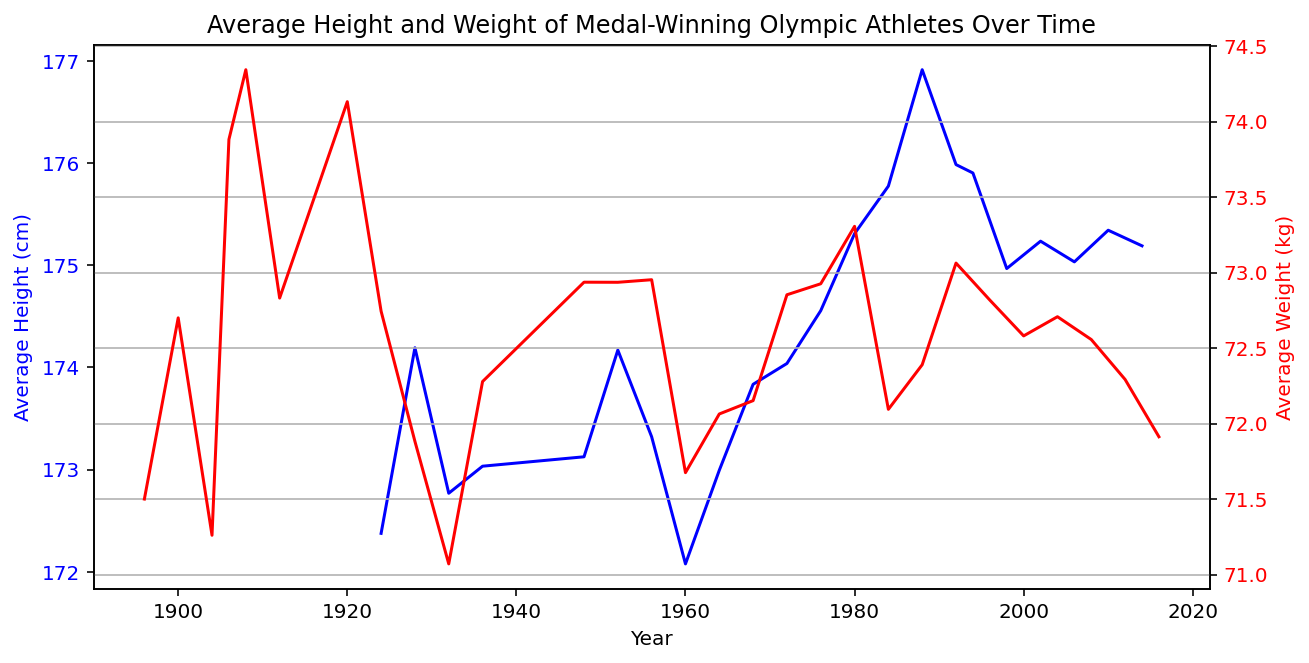

In [21]:
fig, ax1 = plt.subplots(figsize=(10,5))

# Plot average height
ax1.plot(avg_heights_medal_winners.index, avg_heights_medal_winners.values, color='blue', label='Average Height')
ax1.set_xlabel('Year')
ax1.set_ylabel('Average Height (cm)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis sharing the same x-axis
ax2 = ax1.twinx()

# Plot average weight
ax2.plot(avg_weights_medal_winners.index, avg_weights_medal_winners.values, color='red', label='Average Weight')
ax2.set_ylabel('Average Weight (kg)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Set title and show grid
plt.title('Average Height and Weight of Medal-Winning Olympic Athletes Over Time')
plt.grid(True)
plt.show()


<Figure size 1080x576 with 0 Axes>

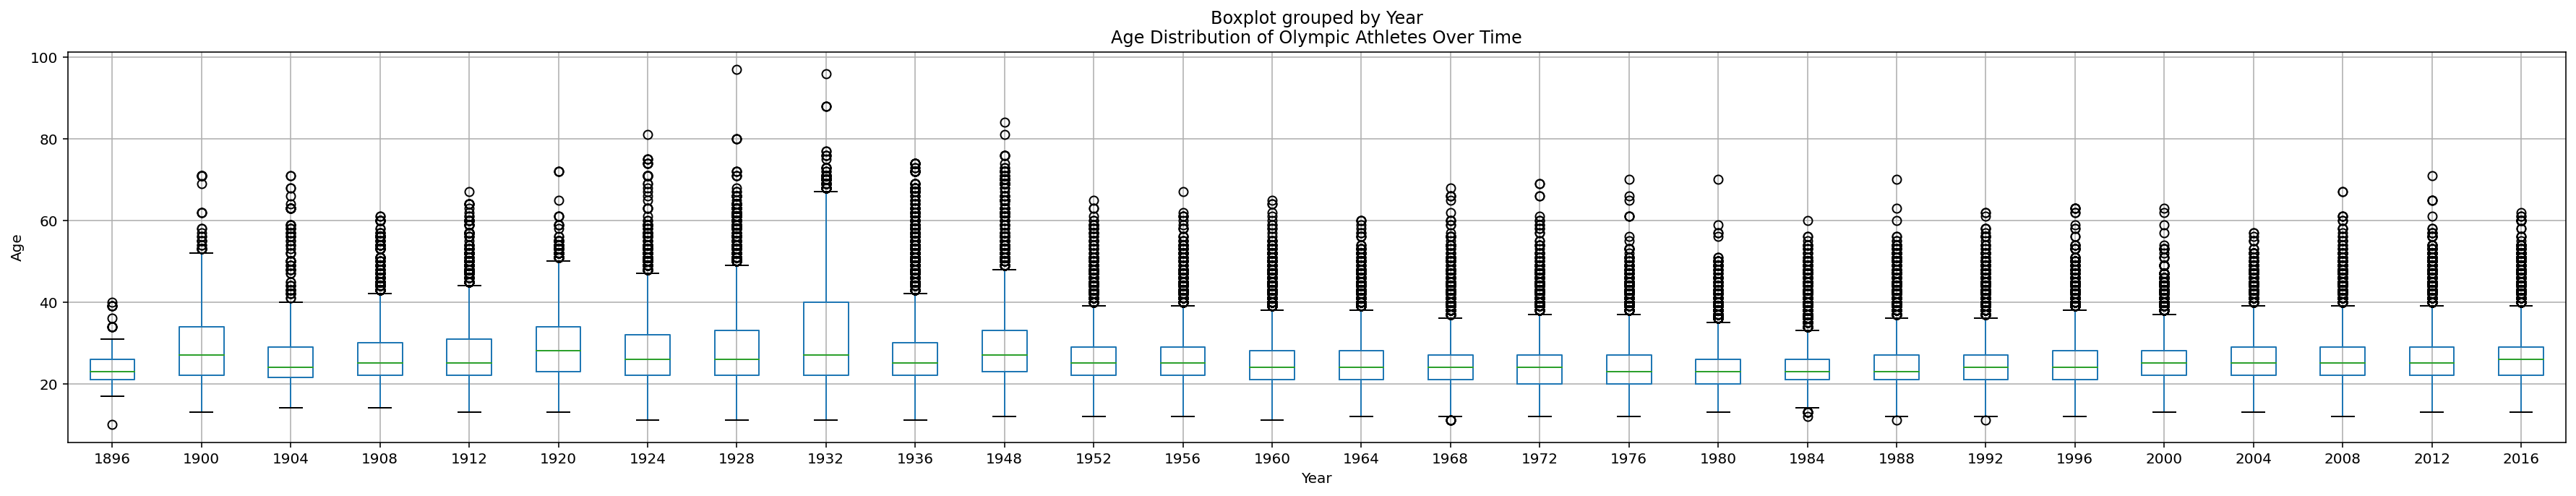

In [25]:
# Set the size of the plot
plt.figure(figsize=(15,8))

# Create the boxplot
# Note: Due to potentially large amount of years, it might be beneficial to sample
# every nth year for better visualization. In this case, we're sampling every 4th year.
olympics[olympics['Year'] % 4 == 0].boxplot(column='Age', by='Year', grid=True, figsize = (30,5))

# Set the labels and title
plt.xlabel('Year')
plt.ylabel('Age')
plt.title('Age Distribution of Olympic Athletes Over Time')

# Show the plot
plt.show()


In [26]:
bins = list(range(0, 105, 5))
labels = ['{}-{}'.format(i, i+4) for i in range(0, 100, 5)]
olympics['Age Group'] = pd.cut(olympics['Age'], bins=bins, labels=labels)


In [27]:
age_group_counts = olympics['Age Group'].value_counts().sort_index()


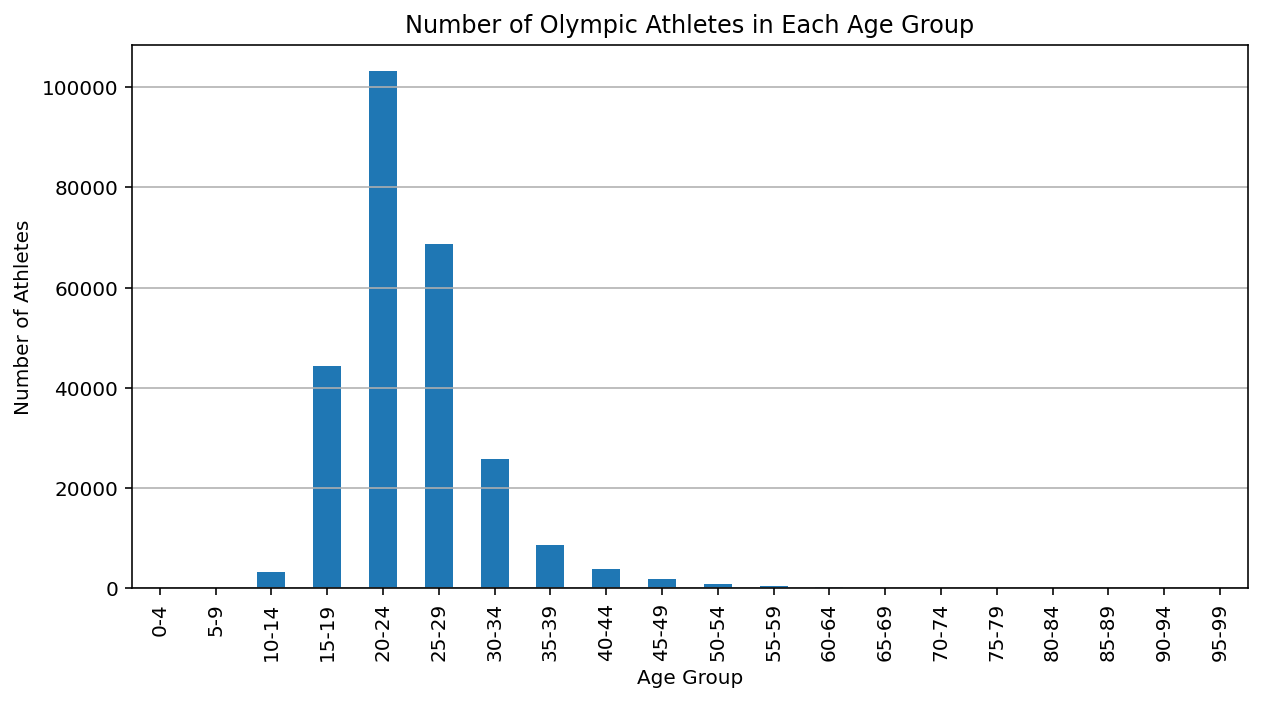

In [28]:
age_group_counts.plot(kind='bar', figsize=(10,5))
plt.xlabel('Age Group')
plt.ylabel('Number of Athletes')
plt.title('Number of Olympic Athletes in Each Age Group')
plt.grid(axis='y')
plt.show()